# train time

In [1]:
import numpy as np
import matplotlib.pyplot as plt

train0-10
~~~python
args = dotdict({
    'numIters': 10, #1000
    'numEps': 100, #100
    'tempThreshold': 15,
    'updateThreshold': 0.6,
    'maxlenOfQueue': 200000,
    'numMCTSSims': 25,
    'arenaCompare': 40, #40
    'cpuct': 1,
    'checkpoint': './temp/',
    'load_model': True,
    'load_folder_file': ('./temp','checkpoint_0.pth.tar'),
    'numItersForTrainExamplesHistory': 20,
    'colab': False,
})
~~~

In [13]:
epoch = [i for i in range(1, 11)]
num_data = [4, 410, 818, 1225, 1633, 2038, 2446, 2853, 3261, 3668]
time_per_epoch = np.array([0, 0.5, 1, 1.8, 2.2, 2.8, 3.3, 4, 4.5, 5])*10+3#min

In [14]:
print(time_per_epoch)
print(sum(time_per_epoch)/60)
epoch

[ 3.  8. 13. 21. 25. 31. 36. 43. 48. 53.]
4.683333333333334


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

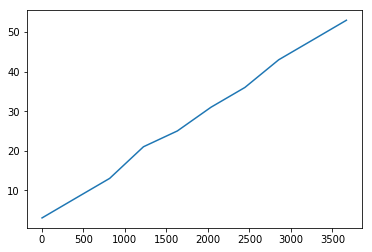

In [8]:
plt.plot(num_data, time_per_epoch)

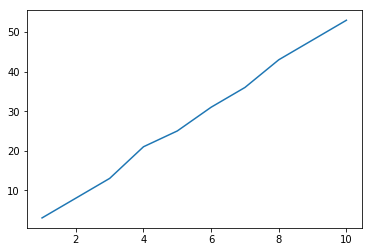

In [15]:
plt.plot(epoch, time_per_epoch)

In [15]:
def predEps(start_epoch, end_epoch):
    return 3*(end_epoch**2 - start_epoch**2)/60 #hour
print(predEps(1,78))
print(predEps(26,30))

304.15
11.2


In [47]:
from pickle import Pickler, Unpickler
with open("./train_6x6_1_10/checkpoint_9.pth.tar.examples", "rb") as f:
    a = Unpickler(f).load()
    print(a[0][0])

(array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0, -1,  1,  0,  0],
       [ 0,  0,  1, -1,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0]]), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 1)


In [37]:
! cd ..
!../pwd

/bin/sh: ../pwd: No such file or directory


In [11]:
import numpy as np
import torch
from utils import dotdict
from othello.pytorch.NNet import NNetWrapper
from othello.pytorch.OthelloNNet import OthelloNNet
from othello.OthelloGame import OthelloGame as Game
args = dotdict({
    'lr': 0.001,
    'dropout': 0.3,
    'epochs': 10,
    'batch_size': 64,
    'cuda': torch.cuda.is_available(),
    'num_channels': 512,
})

def count_params(model):
    """Count the number of parameters in the current TensorFlow graph """
    param_count = np.sum([np.prod(p.size()) for p in model.parameters()])
    return param_count

g = Game(6)
nnet = OthelloNNet(g, args)
count_params(nnet)

9734182